In [167]:
import numpy as np
from collections import deque
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import product


In [168]:
class NetworkProcessor7:
    def __init__(self):
      self.lines_list = []
      self.edges = []
      self.nodes = []
      self.network_array = []
      self.undirected_network_array = []
      self.final_path_BFS = []
      self.formatted_paths = []
      self.last_element = []
      self.formatted_paths_BFS_modified = []
      self.strongly_connected_components = []

    def read_file(self, file_path):
      with open(file_path, 'r') as file:
        line = file.readline()
        while line:
          self.lines_list.append(line.strip())
          line = file.readline()

    def get_edges(self):
      edge = [item.strip('\n') for item in self.lines_list]
      self.edges = [item.split('\t\t') for item in edge]

    def get_unique_nodes(self):
      all_nodes = [item for sublist in self.edges for item in sublist]
      unique_nodes = list(set(all_nodes))
      self.nodes = sorted(unique_nodes)

    def get_network_array(self):
      self.network_array = np.zeros((len(self.nodes), len(self.nodes)), dtype=int)
      for start_node, end_node in self.edges:
        row = self.nodes.index(start_node)
        col = self.nodes.index(end_node)
        self.network_array[row, col] = 1

    def get_undirected_network_array(self):
      self.undirected_network_array = np.maximum(self.network_array, self.network_array.T)#改成無相圖

    def tarjan(self):
        def dfs(node):
          nonlocal index
          index += 1
          low_links[node] = indexes[node] = index
          stack.append(node)
          on_stack[node] = True
          for neighbor, edge_exists in enumerate(self.network_array[node]):
            if edge_exists:
              if indexes[neighbor] == 0:
                dfs(neighbor)
                low_links[node] = min(low_links[node], low_links[neighbor])
              elif on_stack[neighbor]:
                low_links[node] = min(low_links[node], indexes[neighbor])
          if low_links[node] == indexes[node]:
            scc = []
            while True:
              w = stack.pop()
              on_stack[w] = False
              scc.append(self.nodes[w])
              if w == node:
                break
            self.strongly_connected_components.append(scc)
        num_nodes = len(self.network_array)
        indexes = [0] * num_nodes
        low_links = [0] * num_nodes
        on_stack = [False] * num_nodes
        stack = []
        index = 0
        for node in range(num_nodes):
          if indexes[node] == 0:
            dfs(node)

    def display_scc(self):
      for i, scc in enumerate(self.strongly_connected_components, 1):
        print(f"Strongly Connected Component {i}: {scc}")

    def build_scc_graph(self):
      num_sccs = len(self.strongly_connected_components)
      scc_graph = np.zeros((num_sccs, num_sccs), dtype=int)
      # Build the SCC graph
      for i in range(num_sccs):
        scc1 = self.strongly_connected_components[i]
        for j in range(num_sccs):
          scc2 = self.strongly_connected_components[j]
          for node1 in scc1:
            for node2 in scc2:
              if self.network_array[self.nodes.index(node1)][self.nodes.index(node2)] == 1:
                scc_graph[i][j] = 1
                break  # If one edge is found, move to the next pair
      return scc_graph

    def adjacency_matrix(self, edges, nodes):
      matrix = np.zeros((len(nodes), len(nodes)), dtype=int)
      for start_node, end_node in edges:
        row = nodes.index(start_node)
        col = nodes.index(end_node)
        matrix[row, col] = 1
      return matrix

    def is_strongly_connected(self, matrix):
      def dfs(v, visited):
        visited[v] = True
        for i, edge in enumerate(matrix[v]):
          if edge and not visited[i]:
            dfs(i, visited)
      visited = [False] * len(matrix)
      dfs(0, visited)
      return all(visited)

    def matrix_to_edge_list(self, matrix, node_names):
      edges = []
      num_nodes = len(node_names)
      for i in range(num_nodes):
        for j in range(num_nodes):
          if matrix[i][j] == 1 and i != j:
            edges.append((node_names[i], node_names[j]))
      return edges

    def get_network_X_plot(self):
      G = nx.DiGraph()  # Use DiGraph for directed graphs
      G.add_nodes_from(self.nodes)
      G.add_edges_from(self.edges)
      pos = nx.spring_layout(G)
      nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_color='black', font_weight='bold')
      plt.show()

    def find_strongly_connected_combination(self, max_combinations=10):
      possible_combinations = list(product([0, 1], repeat=len(self.edges)))[:max_combinations]
      for edge1, combination in enumerate(possible_combinations, 1):
        new_graph = []
        for i, edge in enumerate(self.edges):
          if combination[i] == 0:
            new_graph.append(edge)
          else:
            new_graph.append(edge[::-1])
        adjacency_matrix = self.adjacency_matrix(new_graph, self.nodes)
        if self.is_strongly_connected(adjacency_matrix):
          print("Found a strongly connected graph:")
          print(new_graph)
          self.edges = new_graph  # Update the edges
          self.get_network_X_plot()
          break

    def is_cut_node(self, adj_matrix, unique_elements):
      nodes = len(unique_elements)
      cut_nodes = []
      for j in range(nodes):
        adj_matrix_1 = adj_matrix.copy()
        cut_node = j
        new_matrix = np.delete(adj_matrix_1, j, axis=0)
        new_matrix = np.delete(new_matrix, j, axis=1)
        if not self.is_strongly_connected(new_matrix):
          cut_nodes.append(unique_elements[j])
      return cut_nodes



### Do condensation for the digraph network 3
• Treat networks 3 as a undirected graph
• is it strongly orientable? \
• if yes, find the strongly oriented graph and, find the vertex-cut and its vertex-connectivity

Strongly Connected Component 1: ['h']
Strongly Connected Component 2: ['j']
Strongly Connected Component 3: ['c']
Strongly Connected Component 4: ['f']
Strongly Connected Component 5: ['g', 'e', 'd']
Strongly Connected Component 6: ['i']


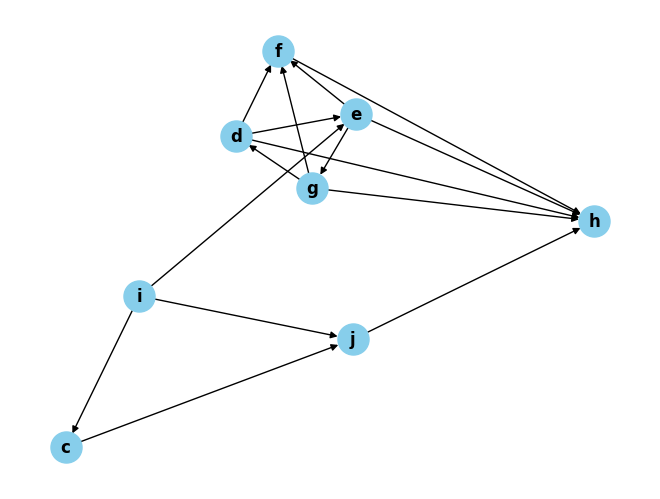

In [169]:
network = NetworkProcessor7()
network.read_file('Network3.txt')
network.get_edges()
network.get_unique_nodes()
network.get_network_array()
network.get_undirected_network_array()

network.tarjan()
network.display_scc()

# Plot the network
network.get_network_X_plot()

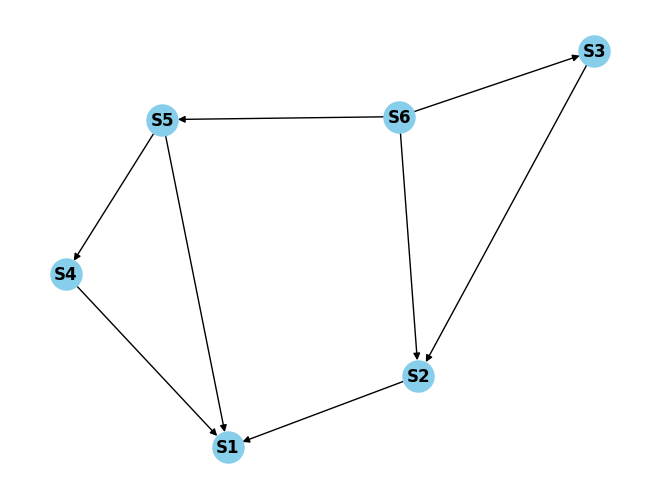

In [170]:
# Build the SCC graph and plot it
scc_graph = network.build_scc_graph()
node_names = ['S' + str(i+1) for i in range(len(network.strongly_connected_components))]
edges = network.matrix_to_edge_list(scc_graph, node_names)
network.nodes = node_names
network.edges = edges
network.get_network_X_plot()

Found a strongly connected graph:
[['c', 'j'], ['d', 'e'], ['d', 'f'], ['d', 'h'], ['e', 'f'], ['e', 'g'], ['e', 'h'], ['f', 'h'], ['g', 'f'], ['g', 'd'], ['g', 'h'], ['i', 'c'], ['j', 'i'], ['i', 'e'], ['j', 'h']]


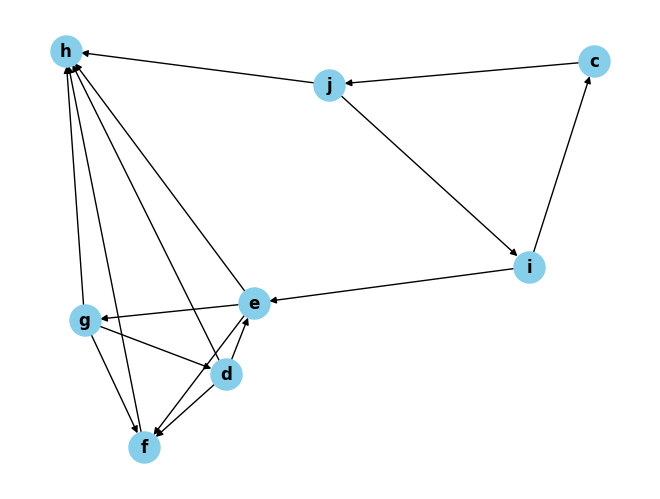

In [171]:
network = NetworkProcessor7()
network.read_file('/content/drive/MyDrive/生物網路/Network 3_new.txt')
network.get_edges()
network.get_unique_nodes()
network.find_strongly_connected_combination()

In [172]:
new_adjacency_matrix = network.adjacency_matrix(network.edges, network.nodes)
cut_nodes = network.is_cut_node(new_adjacency_matrix, network.nodes)

print('Cut nodes:', cut_nodes)

Cut nodes: ['c', 'e', 'g', 'i', 'j']
